Loan Default Prediction Problem

In [1]:
#Importing python libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the file in the directory

df= pd.read_csv('C:/Users/simran/OneDrive/Desktop/Summer_internship/Default_Fin.csv')

In [3]:
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
#Q1
##Number of people who will be given a grace period of exactly 15 days

count=len(df[(df["Defaulted?"]==1) & (df["Annual Salary"]>100000) & (df["Bank Balance"]>5000) & (df["Employed"]!=0)])
print(count)

206


In [5]:
#Q2
##Maximum fine levied by the bank in the period of 15 days

maximum_balance=df["Bank Balance"][(df["Defaulted?"]==1) & (df["Annual Salary"]>100000) & (df["Bank Balance"]>5000)].max()
maximum_fine=(2.5*maximum_balance*15)/100
print(maximum_fine)


11944.44


In [7]:
#Q3
##Assuming all the defaulters haven't paid the EMI get grace, total amount of fine generated by the bank

sum=0
for i in df.Index:
    if df.loc[i-1,'Defaulted?']==0:
        sum+=(2.5*df.loc[i-1,'Bank Balance']*15)/100
    
#Rounding off to 4 decimal places
print(round(sum,4))
 

34972758.9


In [8]:
#Adding a column of whether Grace Period is given or not
df['Grace_Period?']=((df['Defaulted?']==1) & (df['Bank Balance']>5000) & (df["Annual Salary"]>100000)).astype(int)

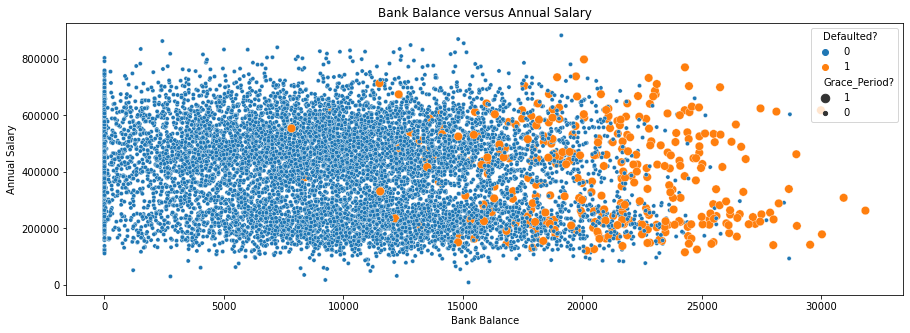

In [9]:
#Q4
##Plot to show the difference between the bank balance of people eligible for grace period and the people who aren't

plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='Bank Balance', y='Annual Salary', hue='Defaulted?', hue_order=[0,1], size='Grace_Period?', size_order=[1,0])
plt.title('Bank Balance versus Annual Salary')
plt.show()

**Explaination:**

---



1.   All the people who are defaulted(orange dots), have bank balance>5000
2.   People eligible for grace period are shown with large orange dots
3. Count of people who are defaulted and are not eligible for grace period=0 (small orange dots)
4. People who are no defauled are shown with blue dots


**Conclusion:**

---

From the figure, we can see that-

1. All the people who are defaulted are eligible for a grace period(large orange dots)
2. People with bank balance between (5000, 15000) are less likely to be defaulted and thus eligible for grace period as compared to people with bank balance in range of (15000, 30000)

In [10]:
#Q5
##Difference in the median of the Bank Balance of people eligible for Grace Period and people who aren't

Tmedian=df["Bank Balance"].median()
Gmedian=df["Bank Balance"][(df["Annual Salary"]>100000) & (df["Bank Balance"]>5000)].median()
difference=Gmedian-Tmedian
#rounding off to 4 decimal places
print(round(difference,4))


1614.42


<AxesSubplot:xlabel='Annual Salary', ylabel='Count'>

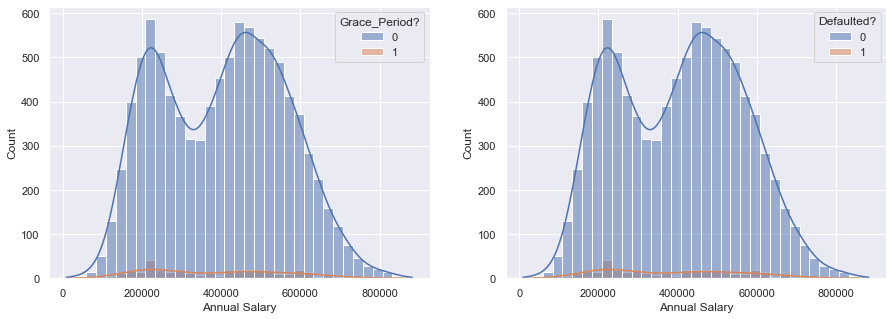

In [12]:
#Q6
##Use a suitable graph to show the changes in the annual income of those people who are eligible for grace period and those who are not.

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.set()
sns.histplot(data=df, x="Annual Salary", kde = True, hue = "Grace_Period?", ax=axes[0])
sns.histplot(data=df, x="Annual Salary", kde = True, hue = "Defaulted?", ax=axes[1])


**Explaination**

---



1.  Both the figures are exactly the same
2. Thus, all the people who are defaulted are eligible for grace period as well (orange line)
3. Graph show value=0 for the interval when Annual Balance <10000



**Conclusion:**

---


From the figure, we can see that-

1. People eligible for grace period (orange line) are widespread across the whole graph. 
2. This shows that people with all kind of annual balance are defaulted and are eligible for grace period. 
3.   The count of people not defaulted and thus not eligible for grace period (blue line) is far more as compared to those who are defaulted and eligible for grace period(orange line)

